**Predicting Survival in the Titanic Data Set
We will be using a decision tree to make predictions about the Titanic data
set from Kaggle. This data set provides information on the Titanic
passengers and can be used to predict whether a passenger survived or
not. You use only Pclass, Sex, Age, SibSp (Siblings aboard), Parch
(Parents/children aboard), and Fare to predict whether a passenger
survived.**

In [223]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split,GridSearchCV
from sklearn import metrics
from sklearn.tree import DecisionTreeClassifier


from sklearn.metrics import classification_report

In [118]:
url="https://raw.githubusercontent.com/BigDataGal/Python-for-Data-Science/master/titanic-train.csv"

In [119]:
titanic = pd.read_csv(url)

In [120]:
titanic.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

In [121]:
df = titanic[['Pclass','Sex','Age','SibSp','Parch','Fare']]

In [122]:
df['Sex'] = df['Sex'].replace({'male':1,'female':0})

C:\Users\tejas\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


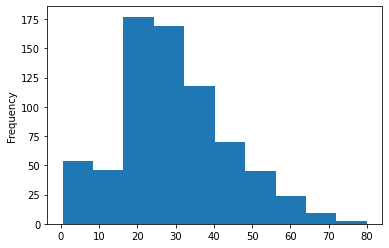

In [123]:
df['Age'].plot(kind = 'hist')

In [124]:
df['Age'] = df['Age'].fillna(df['Age'].median())

C:\Users\tejas\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


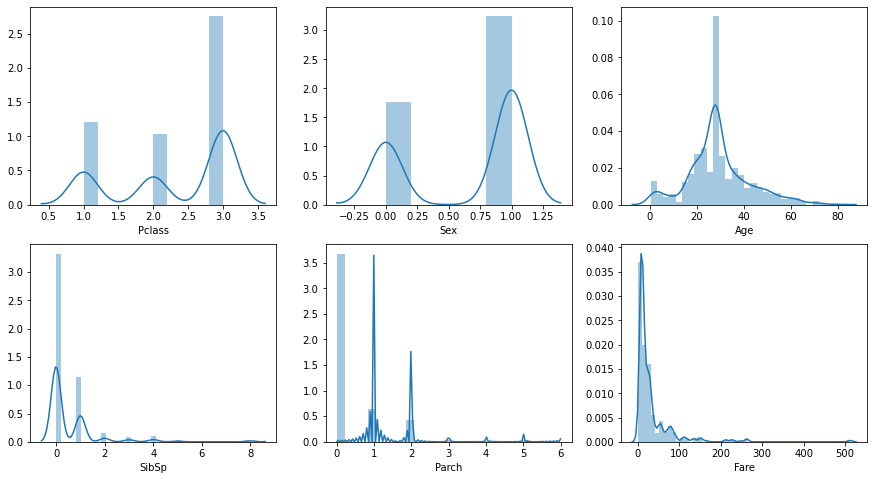

In [125]:
fig,ax = plt.subplots(2,3,figsize = (15,8)) 
c = 0
for i in range(2):
    for j in range(3):
        sns.distplot(df[df.columns[c]],ax = ax[i,j])
        c+=1

In [126]:
df.describe()

,Pclass,Sex,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000
mean,2.308642,0.647587,29.361582,0.523008,0.381594,32.204208
std,0.836071,0.477990,13.019697,1.102743,0.806057,49.693429
min,1.000000,0.000000,0.420000,0.000000,0.000000,0.000000
25%,2.000000,0.000000,22.000000,0.000000,0.000000,7.910400
50%,3.000000,1.000000,28.000000,0.000000,0.000000,14.454200
75%,3.000000,1.000000,35.000000,1.000000,0.000000,31.000000
max,3.000000,1.000000,80.000000,8.000000,6.000000,512.329200


The age column was missing some data. I have imputed the median in place of nan values looking at the skewness of the data.

In [127]:
X = df
y = titanic['Survived']

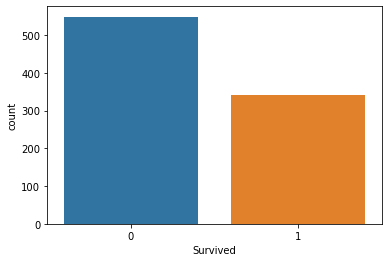

In [128]:
sns.countplot(y)
plt.show()

In [129]:
x_train,x_test,y_train,y_test = train_test_split(X,y,test_size = 0.2,random_state = 456)

In [132]:
#let's first visualize the tree on the data without doing any pre processing
clf = DecisionTreeClassifier()
clf.fit(x_train,y_train)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=None, splitter='best')

In [133]:
clf.score(x_test,y_test)

0.8100558659217877

In [186]:
py_pred = pd.Series(clf.predict(x_test))

In [187]:
py_pred

0      0
1      0
2      1
3      0
4      1
      ..
174    1
175    1
176    0
177    0
178    0
Length: 179, dtype: int64

In [202]:
testvspred = pd.DataFrame(np.column_stack([y_test,py_pred]),columns = ['test','pred'])

In [205]:
scalar = StandardScaler()

x_transform = scalar.fit_transform(X)

In [206]:
x_train,x_test,y_train,y_test = train_test_split(x_transform,y,test_size = 0.30, random_state= 355)

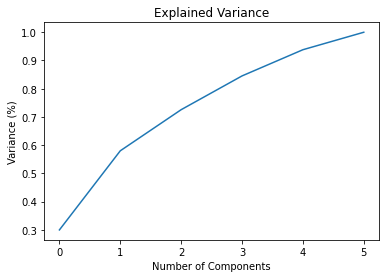

In [214]:
from sklearn.decomposition import PCA
import numpy as np
pca = PCA()
principalComponents = pca.fit_transform(x_transform)
plt.figure()
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('Number of Components')
plt.ylabel('Variance (%)') #for each component
plt.title('Explained Variance')

plt.show()

We can see that 4 components explain close to 90% of the data

In [215]:
pca = PCA(n_components=4)
new_data = pca.fit_transform(x_transform)

principal_x = pd.DataFrame(new_data,columns=['PC-1','PC-2','PC-3','PC-4'])

In [216]:
principal_x

,PC-1,PC-2,PC-3,PC-4
0,-0.970505,-0.835441,0.562544,0.324060
1,1.561132,1.277116,-0.729025,0.005825
2,-0.474818,-0.469035,-1.596481,-0.086882
3,1.353378,1.050851,-0.826629,0.045509
4,-1.304128,0.117142,0.298821,-0.310134
...,...,...,...,...
886,-0.755747,0.443410,0.299733,0.439013
887,0.757916,0.634091,-1.461534,0.965694
888,1.187362,-1.604066,-0.837217,-1.223097
889,-0.071935,1.134035,0.413911,0.861384


In [220]:
# let's see how well our model perform on this new data
x_train,x_test,y_train,y_test = train_test_split(principal_x,y,test_size = 0.20, random_state= 355)
#let's first visualize the tree on the data without doing any pre processing
clf = DecisionTreeClassifier()
clf.fit(x_train,y_train)
clf.score(x_test,y_test)

0.6815642458100558

In [221]:
grid_param = {
    'criterion': ['gini', 'entropy'],
    'max_depth' : range(2,32,1),
    'min_samples_leaf' : range(1,10,1),
    'min_samples_split': range(2,10,1),
    'splitter' : ['best', 'random']
    
}

In [224]:
grid_search = GridSearchCV(estimator=clf,
                     param_grid=grid_param,
                     cv=5,
                    n_jobs =-1)

In [225]:
grid_search.fit(x_train,y_train)

C:\Users\tejas\Anaconda3\lib\site-packages\sklearn\model_selection\_search.py:814: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


GridSearchCV(cv=5, error_score='raise-deprecating',
             estimator=DecisionTreeClassifier(class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features=None,
                                              max_leaf_nodes=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              presort=False, random_state=None,
                                              splitter='best'),
             iid='warn', n_jobs=-1,
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': range(2, 32),
                         'm

In [226]:
best_parameters = grid_search.best_params_
print(best_parameters)

{'criterion': 'entropy', 'max_depth': 7, 'min_samples_leaf': 1, 'min_samples_split': 8, 'splitter': 'random'}


In [227]:
grid_search.best_score_

0.8146067415730337

In [228]:
clf = DecisionTreeClassifier(criterion = 'entropy', max_depth =7, min_samples_leaf= 1, min_samples_split= 8, splitter ='random')
clf.fit(x_train,y_train)

DecisionTreeClassifier(class_weight=None, criterion='entropy', max_depth=7,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=8,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=None, splitter='random')

In [229]:
clf.score(x_test,y_test)

0.8324022346368715

After performing GridSearchCV we see a 2% increase in our accuracy.

In [231]:
# let's save the model
import pickle

with open('modelForPrediction.sav', 'wb') as f:
    pickle.dump(clf,f)
    
with open('standardScalar.sav', 'wb') as f:
    pickle.dump(scalar,f)

with open('pca_model.sav', 'wb') as f:
    pickle.dump(pca,f)